In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install hurst

from hurst import compute_Hc


In [75]:

prices = pd.read_csv('final_data_norm.csv', parse_dates=['Timestamp'], index_col='Timestamp')

prices = prices.apply(lambda col: col.abs() if col.name != 'Timestamp' else col)
prices

,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr14,Instr15,Instr16,Instr17,Instr18,Instr19,Instr20
Timestamp,,,,,,,,,,,,,,,,,,,,
2016-03-11,1.416659,1.420558,1.426727,1.426903,1.424853,1.421595,1.414042,1.403588,1.393133,1.382952,1.372094,1.360408,1.351622,1.343384,1.333519,1.325976,1.319087,1.313109,1.309208,1.306107
2016-03-14,1.462301,1.472009,1.482483,1.486425,1.485694,1.483600,1.477712,1.468183,1.459244,1.449825,1.439647,1.429297,1.421079,1.414141,1.405593,1.398603,1.393041,1.387593,1.384227,1.381651
2016-03-15,1.504228,1.514607,1.527892,1.535233,1.535472,1.533584,1.527089,1.517461,1.508316,1.499284,1.488712,1.477881,1.469107,1.461563,1.452365,1.444678,1.438367,1.432122,1.427919,1.425299
2016-03-16,1.419844,1.426643,1.440522,1.448331,1.447591,1.444372,1.437431,1.428227,1.419032,1.410119,1.399115,1.387963,1.378961,1.370482,1.361888,1.354871,1.348509,1.342255,1.338886,1.336325
2016-03-17,1.355626,1.360255,1.373846,1.382261,1.383064,1.381734,1.377009,1.370292,1.363145,1.355088,1.345784,1.335752,1.327977,1.320802,1.312817,1.306453,1.301592,1.296917,1.294369,1.292677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,0.835726,0.779651,0.811547,0.839093,0.864957,0.887792,0.908630,0.926472,0.941884,0.955530,0.966677,0.975294,0.981823,0.989337,0.998928,1.007441,1.015631,1.022611,1.028738,1.034918
2023-12-01,0.626091,0.664025,0.698311,0.730168,0.758640,0.782129,0.802080,0.818593,0.833516,0.846164,0.856458,0.865071,0.871727,0.881696,0.890817,0.898892,0.907484,0.914124,0.920744,0.929995
2023-12-04,0.580980,0.625299,0.666123,0.703383,0.737745,0.766944,0.791685,0.813265,0.831472,0.846861,0.859302,0.869422,0.879116,0.890729,0.900785,0.910606,0.919412,0.927077,0.934759,0.945104


In [76]:
# calculate cumulative returns
cumret = np.log(prices).diff().cumsum()+1
cumret.dropna(how='all', inplace=True)
cumret.dropna(axis=1, inplace=True)

In [77]:
# define a set of formation\trading periods
periods = [('2016-07-01', '2017-07-01', '2017-07-01', '2018-01-01'),
           ('2016-08-01', '2017-08-01', '2017-08-01', '2018-02-01'),
           ('2016-09-01', '2017-09-01', '2017-09-01', '2018-03-01'),
           ('2016-10-01', '2017-10-01', '2017-10-01', '2018-04-01'),
           ('2016-11-01', '2017-11-01', '2017-11-01', '2018-05-01'),
           ('2016-12-01', '2017-12-01', '2017-12-01', '2018-06-01'),
           ('2017-01-01', '2018-01-01', '2018-01-01', '2018-07-01'),
           ('2017-02-01', '2018-02-01', '2018-02-01', '2018-08-01'),
           ('2017-03-01', '2018-03-01', '2018-03-01', '2018-09-01'),
           ('2017-04-01', '2018-04-01', '2018-04-01', '2018-10-01'),
           ('2017-05-01', '2018-05-01', '2018-05-01', '2018-11-01'),
           ('2017-06-01', '2018-06-01', '2018-06-01', '2018-12-01'),
           ('2017-07-01', '2018-07-01', '2018-07-01', '2019-01-01'),
           ('2017-08-01', '2018-08-01', '2018-08-01', '2019-02-01'),
           ('2017-09-01', '2018-09-01', '2018-09-01', '2019-03-01'),
           ('2017-10-01', '2018-10-01', '2018-10-01', '2019-04-01'),
           ('2017-11-01', '2018-11-01', '2018-11-01', '2019-05-01'),
           ('2017-12-01', '2018-12-01', '2018-12-01', '2019-06-01'),
           ('2018-01-01', '2019-01-01', '2019-01-01', '2019-07-01'),
           ('2018-02-01', '2019-02-01', '2019-02-01', '2019-08-01'),
           ('2018-03-01', '2019-03-01', '2019-03-01', '2019-09-01'),
           ('2018-04-01', '2019-04-01', '2019-04-01', '2019-10-01'),
           ('2018-05-01', '2019-05-01', '2019-05-01', '2019-11-01'),
           ('2018-06-01', '2019-06-01', '2019-06-01', '2019-12-01')]


In [78]:
cols = ['CADF p-value', 'Num zero-crossings', 'Pearson r', 'Spread mean', 'Spread SD', 'Hurst Exponent',
        'Half-life of mean reversion', 'Hedge ratio', 'Current spread price', 'Deviation from the mean (SD)', 'TTC']
data = pd.DataFrame(columns=cols)

for form_start, form_end, trade_start, trade_end in periods:
    print(f'Processing period {form_start} : {trade_end}')
    # select prices for formation and trading periods
    cumret_tmp = cumret[form_start:trade_end]
    cumret_tmp = cumret_tmp / cumret_tmp.iloc[0]
    cumret_form = cumret_tmp[:form_end]
    cumret_trade = cumret_tmp[trade_start:]

    # select potential pairs
    pairs_tmp = select_pairs(cumret_form, cumret_trade)

    # calculate current deviation from the mean (in standard deviations)
    pairs_tmp['Deviation from the mean (SD)'] = (pairs_tmp['Current spread price'] -
                                                 pairs_tmp['Spread mean']) / pairs_tmp['Spread SD']
    # separate deviated pairs
    deviated_pairs = pairs_tmp[(abs(pairs_tmp['Deviation from the mean (SD)']) >= 2) &
                               (abs(pairs_tmp['Deviation from the mean (SD)']) <= 3)].copy()

    # calculate time to converge (in days)
    for pair in deviated_pairs.index:
        s1, s2 = parse_pair(pair)
        hedge_ratio = deviated_pairs.loc[pair]['Hedge ratio']
        spread_mean = deviated_pairs.loc[pair]['Spread mean']
        spread_dev = deviated_pairs.loc[pair]['Deviation from the mean (SD)']
        spread_trade = cumret_trade[s1] - hedge_ratio * cumret_trade[s2]
        # calculate time to convergence
        if spread_dev < 0 and len(spread_trade[spread_trade > spread_mean]) > 0:
            deviated_pairs.loc[pair, ['TTC']] = (pd.to_datetime(spread_trade[spread_trade > spread_mean].index[0])
                                                 - pd.to_datetime(trade_start)).days
        elif spread_dev > 0 and len(spread_trade[spread_trade < spread_mean]) > 0:
            deviated_pairs.loc[pair, ['TTC']] = (pd.to_datetime(spread_trade[spread_trade < spread_mean].index[0])
                                                 - pd.to_datetime(trade_start)).days
        else:
            deviated_pairs.loc[pair, ['TTC']] = 1000

    # save data
    data = pd.concat([data, deviated_pairs], axis=0, ignore_index=True)

# Read CSV file
data = pd.read_csv('final_data_norm.csv', parse_dates=['Timestamp'], index_col='Timestamp')
data = data.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.name != 'Timestamp' else col)

# Ensure case consistency in column names
data.columns = data.columns.str.lower()

# Print column names and types
print("Column names:")
print(data.columns.tolist())
print("\nColumn types:")
print(data.dtypes)

# Replace 'hedge_ratio_column' with the actual column name representing hedge ratios
hedge_ratio_column = 'instr1'  # Change this to the actual column name

# Check if the hedge ratio column is present in the DataFrame columns (case-insensitive)
if hedge_ratio_column.lower() in data.columns:
    # Filter too big and too small hedge ratios
    data = data[(data[hedge_ratio_column] < 3) & (data[hedge_ratio_column] > 0.33)]
else:
    print(f"Column '{hedge_ratio_column}' not found in the DataFrame.")

# ... (continue with the rest of your code)







Processing period 2016-07-01 : 2018-01-01
Processing period 2016-08-01 : 2018-02-01
Processing period 2016-09-01 : 2018-03-01
Processing period 2016-10-01 : 2018-04-01
Processing period 2016-11-01 : 2018-05-01
Processing period 2016-12-01 : 2018-06-01
Processing period 2017-01-01 : 2018-07-01
Processing period 2017-02-01 : 2018-08-01
Processing period 2017-03-01 : 2018-09-01
Processing period 2017-04-01 : 2018-10-01
Processing period 2017-05-01 : 2018-11-01
Processing period 2017-06-01 : 2018-12-01
Processing period 2017-07-01 : 2019-01-01
Processing period 2017-08-01 : 2019-02-01
Processing period 2017-09-01 : 2019-03-01
Processing period 2017-10-01 : 2019-04-01
Processing period 2017-11-01 : 2019-05-01
Processing period 2017-12-01 : 2019-06-01
Processing period 2018-01-01 : 2019-07-01
Processing period 2018-02-01 : 2019-08-01
Processing period 2018-03-01 : 2019-09-01
Processing period 2018-04-01 : 2019-10-01
Processing period 2018-05-01 : 2019-11-01
Processing period 2018-06-01 : 201

In [79]:
def parse_pair(pair):
    '''
    parse pair string S1-S2
    return tickers S1, S2
    '''
    dp = pair.find('-')
    s1 = pair[:dp]
    s2 = pair[dp+1:]

    return s1,s2

def calculate_halflife(spread):
    '''
    calculate half-life of mean reversion of the spread
    '''
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant

    ylag = spread.shift()
    deltay = spread - ylag
    ylag.dropna(inplace=True)
    deltay.dropna(inplace=True)

    res = OLS(deltay, add_constant(ylag)).fit()
    halflife = -np.log(2)/res.params[0]

    return halflife

def select_pairs(cumret_form, cumret_trade):
    '''
    select pairs using data from train dataframe
    return dataframe of selected pairs
    '''
    tested = []

    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.tsa.stattools import coint

    cols = ['CADF p-value', 'Num zero-crossings', 'Pearson r', 'Spread mean', 'Spread SD', 'Hurst Exponent',
            'Half-life of mean reversion', 'Hedge ratio', 'Current spread price']
    pairs = pd.DataFrame(columns=cols)

    for s1 in cumret_form.columns:
        for s2 in cumret_form.columns:
            if s1!=s2 and (f'{s1}-{s2}' not in tested):
                tested.append(f'{s1}-{s2}')
                cadf_p = coint(cumret_form[s1], cumret_form[s2])[1]
                if cadf_p<0.01 and (f'{s2}-{s1}' not in pairs.index): # stop if pair already added as s2-s1
                    res = OLS(cumret_form[s1], add_constant(cumret_form[s2])).fit()
                    hedge_ratio = res.params[s2]
                    if hedge_ratio > 0: # hedge ratio should be posititve
                        spread_form = cumret_form[s1] - hedge_ratio*cumret_form[s2]
                        spread_mean = spread_form.mean()
                        spread_std = spread_form.std()
                        hurst = compute_Hc(spread_form)[0]
                        if hurst<0.5:
                            halflife = calculate_halflife(spread_form)
                            if halflife>1 and halflife<12:
                                # subtract the mean to calculate num_crossings
                                spread_nm = spread_form - spread_form.mean()
                                num_crossings = (spread_nm.values[1:] * spread_nm.values[:-1] < 0).sum()
                                if num_crossings>len(cumret_form.index)/252*12:
                                    pearson_r = np.corrcoef(cumret_form[s1], cumret_form[s2])[0][1]
                                    pairs.loc[f'{s1}-{s2}'] = [cadf_p, num_crossings, pearson_r, spread_mean,
                                                               spread_std, hurst, halflife, hedge_ratio,
                                                               spread_form[-1]]

    return pairs

In [80]:
'''
cols = ['CADF p-value', 'Num zero-crossings', 'Pearson r', 'Spread mean', 'Spread SD', 'Hurst Exponent',
        'Half-life of mean reversion', 'Hedge ratio', 'Current spread price', 'Deviation from the mean (SD)', 'TTC']
data = pd.DataFrame(columns=cols)

for form_start,form_end,trade_start,trade_end in periods:
    print(f'Processing period {form_start} : {trade_end}')
    # select prices for formation and trading periods
    cumret_tmp = cumret[form_start:trade_end]
    cumret_tmp = cumret_tmp/cumret_tmp.iloc[0]
    cumret_form = cumret_tmp[:form_end]
    cumret_trade = cumret_tmp[trade_start:]

    # select potential pairs
    pairs_tmp = select_pairs(cumret_form, cumret_trade)

    # calculate current deviation from the mean (in standard deviations)
    pairs_tmp['Deviation from the mean (SD)'] = (pairs_tmp['Current spread price'] -
                                                 pairs_tmp['Spread mean'])/pairs_tmp['Spread SD']
    # separate deviated pairs
    deviated_pairs = pairs_tmp[(abs(pairs_tmp['Deviation from the mean (SD)'])>=2) &
                               (abs(pairs_tmp['Deviation from the mean (SD)'])<=3)].copy()

    # calculate time to converge (in days)
    for pair in deviated_pairs.index:
        s1,s2 = parse_pair(pair)
        hedge_ratio = deviated_pairs.loc[pair]['Hedge ratio']
        spread_mean = deviated_pairs.loc[pair]['Spread mean']
        spread_dev = deviated_pairs.loc[pair]['Deviation from the mean (SD)']
        spread_trade = cumret_trade[s1] - hedge_ratio*cumret_trade[s2]
        # calculate time to convergence
        if spread_dev<0 and len(spread_trade[spread_trade>spread_mean])>0:
            deviated_pairs.loc[pair, ['TTC']] = (pd.to_datetime(spread_trade[spread_trade>spread_mean].index[0])
                                                 - pd.to_datetime(trade_start)).days
        elif spread_dev>0 and len(spread_trade[spread_trade<spread_mean])>0:
            deviated_pairs.loc[pair, ['TTC']] = (pd.to_datetime(spread_trade[spread_trade<spread_mean].index[0])
                                                 - pd.to_datetime(trade_start)).days
        else:
            deviated_pairs.loc[pair, ['TTC']] = 1000

    # save data
    data = pd.concat([data,deviated_pairs], axis=0, ignore_index=True)
'''

"\ncols = ['CADF p-value', 'Num zero-crossings', 'Pearson r', 'Spread mean', 'Spread SD', 'Hurst Exponent', \n        'Half-life of mean reversion', 'Hedge ratio', 'Current spread price', 'Deviation from the mean (SD)', 'TTC']\ndata = pd.DataFrame(columns=cols)\n\nfor form_start,form_end,trade_start,trade_end in periods:\n    print(f'Processing period {form_start} : {trade_end}')\n    # select prices for formation and trading periods\n    cumret_tmp = cumret[form_start:trade_end]\n    cumret_tmp = cumret_tmp/cumret_tmp.iloc[0]\n    cumret_form = cumret_tmp[:form_end]\n    cumret_trade = cumret_tmp[trade_start:]\n    \n    # select potential pairs\n    pairs_tmp = select_pairs(cumret_form, cumret_trade)\n    \n    # calculate current deviation from the mean (in standard deviations)\n    pairs_tmp['Deviation from the mean (SD)'] = (pairs_tmp['Current spread price'] - \n                                                 pairs_tmp['Spread mean'])/pairs_tmp['Spread SD']\n    # separate deviat

In [81]:
data = pd.read_csv('final_data_norm.csv', parse_dates=['Timestamp'], index_col='Timestamp')
data = prices.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.name != 'Timestamp' else col)

In [82]:
data

,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr14,Instr15,Instr16,Instr17,Instr18,Instr19,Instr20
Timestamp,,,,,,,,,,,,,,,,,,,,
2016-03-11,1.416659,1.420558,1.426727,1.426903,1.424853,1.421595,1.414042,1.403588,1.393133,1.382952,1.372094,1.360408,1.351622,1.343384,1.333519,1.325976,1.319087,1.313109,1.309208,1.306107
2016-03-14,1.462301,1.472009,1.482483,1.486425,1.485694,1.483600,1.477712,1.468183,1.459244,1.449825,1.439647,1.429297,1.421079,1.414141,1.405593,1.398603,1.393041,1.387593,1.384227,1.381651
2016-03-15,1.504228,1.514607,1.527892,1.535233,1.535472,1.533584,1.527089,1.517461,1.508316,1.499284,1.488712,1.477881,1.469107,1.461563,1.452365,1.444678,1.438367,1.432122,1.427919,1.425299
2016-03-16,1.419844,1.426643,1.440522,1.448331,1.447591,1.444372,1.437431,1.428227,1.419032,1.410119,1.399115,1.387963,1.378961,1.370482,1.361888,1.354871,1.348509,1.342255,1.338886,1.336325
2016-03-17,1.355626,1.360255,1.373846,1.382261,1.383064,1.381734,1.377009,1.370292,1.363145,1.355088,1.345784,1.335752,1.327977,1.320802,1.312817,1.306453,1.301592,1.296917,1.294369,1.292677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,0.835726,0.779651,0.811547,0.839093,0.864957,0.887792,0.908630,0.926472,0.941884,0.955530,0.966677,0.975294,0.981823,0.989337,0.998928,1.007441,1.015631,1.022611,1.028738,1.034918
2023-12-01,0.626091,0.664025,0.698311,0.730168,0.758640,0.782129,0.802080,0.818593,0.833516,0.846164,0.856458,0.865071,0.871727,0.881696,0.890817,0.898892,0.907484,0.914124,0.920744,0.929995
2023-12-04,0.580980,0.625299,0.666123,0.703383,0.737745,0.766944,0.791685,0.813265,0.831472,0.846861,0.859302,0.869422,0.879116,0.890729,0.900785,0.910606,0.919412,0.927077,0.934759,0.945104


In [83]:
data.dtypes

Instr1     float64
Instr2     float64
Instr3     float64
Instr4     float64
Instr5     float64
Instr6     float64
Instr7     float64
Instr8     float64
Instr9     float64
Instr10    float64
Instr11    float64
Instr12    float64
Instr13    float64
Instr14    float64
Instr15    float64
Instr16    float64
Instr17    float64
Instr18    float64
Instr19    float64
Instr20    float64
dtype: object

In [84]:
data.describe()

,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr14,Instr15,Instr16,Instr17,Instr18,Instr19,Instr20
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,1999.000000,1999.000000,1999.000000
mean,0.799782,0.807558,0.813135,0.817446,0.821001,0.824015,0.826653,0.829011,0.831089,0.832749,0.834014,0.834945,0.835635,0.836160,0.836651,0.837144,0.837522,0.837788,0.838169,0.838704
std,0.600024,0.589511,0.581791,0.575715,0.570632,0.566268,0.562409,0.558924,0.555828,0.553337,0.551428,0.550017,0.548968,0.548166,0.547417,0.546662,0.546083,0.545674,0.545089,0.544264
min,0.000161,0.000408,0.001653,0.000431,0.000328,0.000102,0.000352,0.001157,0.000029,0.000900,0.001018,0.000695,0.001652,0.000245,0.000911,0.000042,0.000156,0.000076,0.000090,0.000035
25%,0.324243,0.342794,0.354329,0.362057,0.370133,0.377360,0.382808,0.389056,0.396127,0.399572,0.400036,0.401037,0.406482,0.408489,0.407287,0.410553,0.413946,0.418897,0.425059,0.430216
50%,0.692327,0.708284,0.727698,0.738368,0.739917,0.744913,0.752378,0.757328,0.764679,0.766404,0.768994,0.769744,0.766608,0.768033,0.767659,0.766092,0.762600,0.758679,0.756872,0.755405
75%,1.116005,1.123900,1.133579,1.140802,1.147692,1.153377,1.157424,1.156960,1.163604,1.167296,1.170072,1.171144,1.176154,1.181415,1.182181,1.186211,1.193082,1.196121,1.195855,1.198596
max,3.231938,3.137531,3.039475,2.975927,2.966100,2.949156,2.925294,2.900264,2.880234,2.868390,2.858883,2.844000,2.828334,2.812457,2.796952,2.779371,2.757127,2.731694,2.704706,2.680098


In [85]:
data.corr()

,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr14,Instr15,Instr16,Instr17,Instr18,Instr19,Instr20
Instr1,1.000000,0.998465,0.995823,0.992568,0.989147,0.985916,0.982998,0.980202,0.977529,0.974838,0.972283,0.969694,0.967067,0.964345,0.961410,0.958283,0.955077,0.951701,0.948125,0.944331
Instr2,0.998465,1.000000,0.999228,0.997414,0.995102,0.992675,0.990323,0.987965,0.985638,0.983253,0.980929,0.978551,0.976116,0.973564,0.970810,0.967874,0.964847,0.961633,0.958201,0.954522
Instr3,0.995823,0.999228,1.000000,0.999449,0.998143,0.996486,0.994714,0.992825,0.990881,0.988837,0.986792,0.984665,0.982461,0.980128,0.977599,0.974889,0.972069,0.969047,0.965794,0.962281
Instr4,0.992568,0.997414,0.999449,1.000000,0.999602,0.998663,0.997451,0.996028,0.994474,0.992778,0.991027,0.989163,0.987202,0.985104,0.982818,0.980349,0.977750,0.974933,0.971878,0.968557
Instr5,0.989147,0.995102,0.998143,0.999602,1.000000,0.999714,0.999022,0.998045,0.996869,0.995515,0.994056,0.992458,0.990742,0.988881,0.986837,0.984612,0.982238,0.979636,0.976788,0.973673
Instr6,0.985916,0.992675,0.996486,0.998663,0.999714,1.000000,0.999787,0.999225,0.998411,0.997383,0.996209,0.994874,0.993403,0.991777,0.989971,0.987985,0.985835,0.983450,0.980819,0.977919
Instr7,0.982998,0.990323,0.994714,0.997451,0.999022,0.999787,1.000000,0.999820,0.999344,0.998623,0.997723,0.996641,0.995406,0.994010,0.992432,0.990674,0.988743,0.986573,0.984159,0.981477
Instr8,0.980202,0.987965,0.992825,0.996028,0.998045,0.999225,0.999820,1.000000,0.999847,0.999425,0.998792,0.997960,0.996960,0.995791,0.994438,0.992901,0.991186,0.989230,0.987032,0.984570
Instr9,0.977529,0.985638,0.990881,0.994474,0.996869,0.998411,0.999344,0.999847,1.000000,0.999862,0.999487,0.998898,0.998126,0.997179,0.996044,0.994721,0.993215,0.991467,0.989480,0.987233
Instr10,0.974838,0.983253,0.988837,0.992778,0.995515,0.997383,0.998623,0.999425,0.999862,1.000000,0.999878,0.999528,0.998983,0.998254,0.997335,0.996222,0.994920,0.993375,0.991596,0.989561


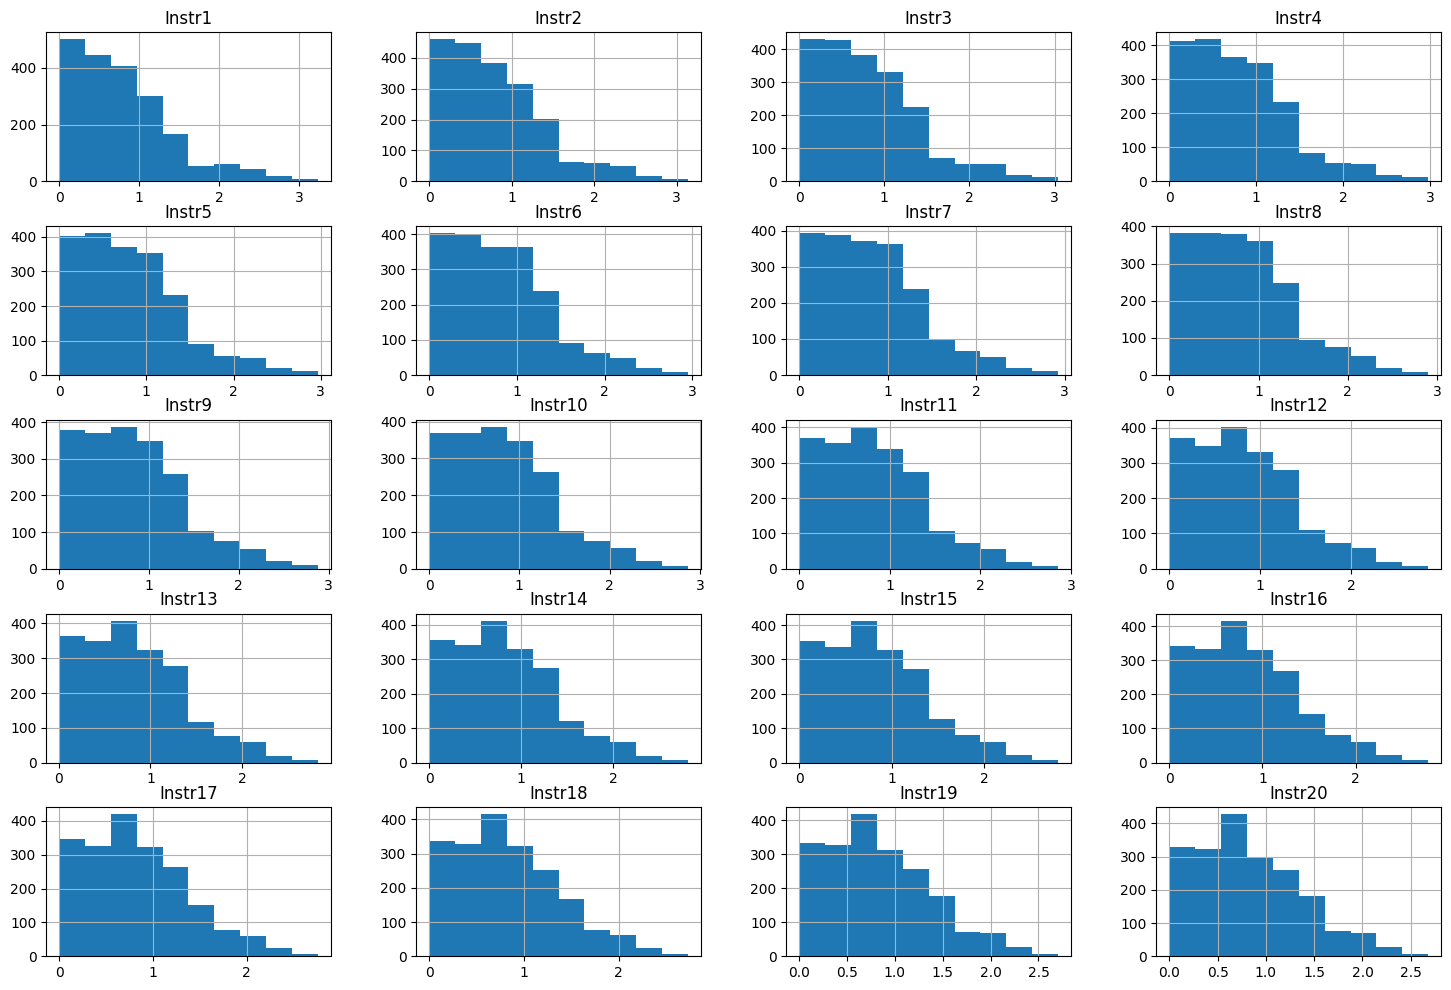

In [86]:
_ = data.hist(figsize=(18,12))

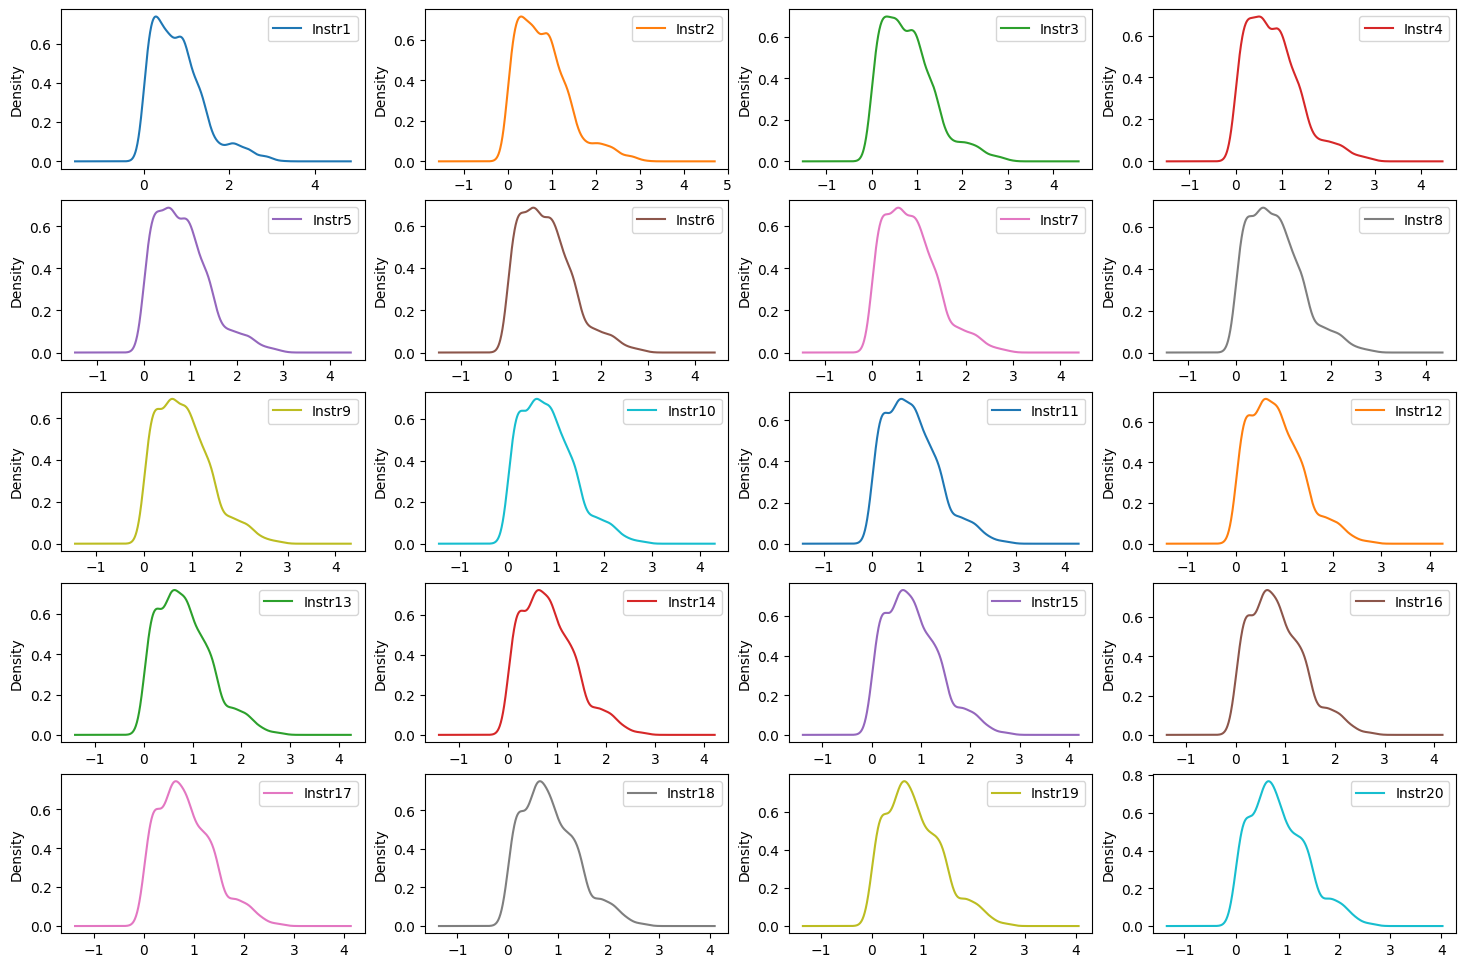

In [88]:
_ = data.plot(kind='density', subplots=True, layout=(5, 4), sharex=False, figsize=(18, 12))


In [89]:
len(data.columns)

20

# ML Classification

In [ ]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
X = data.values[:,:10]
y = data.values[:,10]
binarizer = Binarizer(threshold=30).fit(y.reshape(-1,1))
y_bin = binarizer.transform(y.reshape(-1,1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, shuffle=True,
                                                    random_state=14, stratify=y_bin)

In [ ]:
# benchmark score
len(y_train[y_train==0]) / len(y_train)

0.22882427307206069

In [ ]:
def top10_accuracy(estimator, X, y):
    '''
    compute accuracy of top 10 predictions:
    select top 10 samples with the highest probability of belonging to class 0
    return the fraction of samples actually belonging to class 0
    '''
    pred_prob = estimator.predict_proba(X)[:,0]
    top10_ind = np.argsort(pred_prob)[-10:]
    top10_prob = pred_prob[top10_ind]
    # if at least one of top ten probabilities is less than 0.5, return 0 score
    if len(top10_prob[top10_prob<0.5])>0:
        score = 0
    else:
        score = sum(y[top10_ind] == np.zeros(10))/10

    return score

In [ ]:
def test_models_class(models, X=X_train, y=y_train, n_folds=10, scoring=top10_accuracy, seed=45):
    '''
    cross-validate each model in models using n_folds and scoring
    '''

    results = []
    names = []
    for name,model in models:
        kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

    return results, names

In [ ]:
models = []
models.append(('LR', LogisticRegressionCV(max_iter=1000, class_weight='balanced', scoring=top10_accuracy)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA_1', QuadraticDiscriminantAnalysis()))
models.append(('QDA_2', QuadraticDiscriminantAnalysis(reg_param=0.1)))
models.append(('KNN_1', KNeighborsClassifier()))
models.append(('KNN_2', KNeighborsClassifier(weights='distance')))
models.append(('CART_1', DecisionTreeClassifier(class_weight='balanced')))
models.append(('CART_2', DecisionTreeClassifier(max_features='auto', class_weight='balanced')))
models.append(('NB', GaussianNB()))
models.append(('GPC', GaussianProcessClassifier(1.0 * RBF(1.0), n_jobs=-1)))
models.append(('MLP_1', MLPClassifier(max_iter=5000)))
models.append(('MLP_2', MLPClassifier(alpha=1, max_iter=5000)))
models.append(('SVM', SVC(class_weight='balanced', probability=True)))

results,names = test_models_class(models)

LR: 0.25999999999999995 (0.066332495807108)
LDA: 0.0 (0.0)
QDA_1: 0.37999999999999995 (0.14696938456699069)
QDA_2: 0.0 (0.0)
KNN_1: 0.24 (0.128062484748657)
KNN_2: 0.23000000000000004 (0.10999999999999999)
CART_1: 0.27999999999999997 (0.12489995996796796)
CART_2: 0.22000000000000003 (0.07483314773547882)
NB: 0.27 (0.14866068747318506)
GPC: 0.0 (0.0)
MLP_1: 0.0 (0.0)
MLP_2: 0.0 (0.0)
SVM: 0.0 (0.0)


In [ ]:
pipelines = []
for name,model in models:
    pipelines.append((f'scaled{name}', Pipeline([('scaler', PowerTransformer()),
                                                 (name,model)])))

results,names = test_models_class(pipelines)

scaledLR: 0.38 (0.10770329614269007)
scaledLDA: 0.0 (0.0)
scaledQDA_1: 0.30999999999999994 (0.13)
scaledQDA_2: 0.04 (0.12)
scaledKNN_1: 0.29 (0.157797338380595)
scaledKNN_2: 0.29000000000000004 (0.11357816691600547)
scaledCART_1: 0.34 (0.12000000000000001)
scaledCART_2: 0.28 (0.11661903789690602)
scaledNB: 0.05 (0.15000000000000002)
scaledGPC: 0.0 (0.0)
scaledMLP_1: 0.36 (0.19595917942265426)
scaledMLP_2: 0.0 (0.0)
scaledSVM: 0.0 (0.0)


In [ ]:
pipelines = []
for name,model in models:
    pipelines.append((f'scaled{name}_pca4', Pipeline([('scaler', PowerTransformer()),
                                                 ('PCA', PCA(n_components=4)),
                                                 (name,model)])))

results,names = test_models_class(pipelines)

scaledLR_pca4: 0.36 (0.11135528725660045)
scaledLDA_pca4: 0.0 (0.0)
scaledQDA_1_pca4: 0.0 (0.0)
scaledQDA_2_pca4: 0.0 (0.0)
scaledKNN_1_pca4: 0.31 (0.14456832294800961)
scaledKNN_2_pca4: 0.27 (0.11874342087037916)
scaledCART_1_pca4: 0.25 (0.11180339887498948)
scaledCART_2_pca4: 0.19 (0.09433981132056604)
scaledNB_pca4: 0.0 (0.0)
scaledGPC_pca4: 0.0 (0.0)
scaledMLP_1_pca4: 0.0 (0.0)
scaledMLP_2_pca4: 0.0 (0.0)
scaledSVM_pca4: 0.0 (0.0)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

ensembles = []
ensembles.append(('ADA', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(class_weight='balanced')))
ensembles.append(('ET', ExtraTreesClassifier(class_weight='balanced')))


results,names = test_models_class(ensembles)

ADA: 0.03 (0.09)
GBM: 0.0 (0.0)
RF: 0.0 (0.0)
ET: 0.0 (0.0)


In [ ]:
model = Pipeline([('scaler', PowerTransformer()),
                  ('LR', LogisticRegressionCV(max_iter=1000, class_weight='balanced', scoring=top10_accuracy))])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', PowerTransformer()),
                ('LR',
                 LogisticRegressionCV(class_weight='balanced', max_iter=1000,
                                      scoring=<function top10_accuracy at 0x7f28b5ee21f0>))])

In [ ]:
top10_accuracy(model, X_test, y_test)

0.4